In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('side_view/h22.jpg')
if image is None:
    print("Error: Could not load image.")
    exit()
    
#image = cv2.resize(image, (500, 500))

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection to identify plant edges
edges = cv2.Canny(blurred, 50, 150)

# Morphological operations to close gaps in edges
kernel = np.ones((5, 5), np.uint8)
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Find contours from the edge map
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Identify the largest contour (assumed to be the plant)
if contours:
    plant_contour = max(contours, key=cv2.contourArea)

    # Get bounding box around the plant
    x, y, w, h = cv2.boundingRect(plant_contour)

    # Draw the bounding box and height line
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.line(image, (x + w // 2, y), (x + w // 2, y + h), (255, 0, 0), 6)

    # Display height in pixels
    height = h
    cv2.putText(image, f'Height: {height} px', (x, y - 50),
                cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0), 6)

    print(f'Plant height: {height} pixels')

# Convert BGR image to RGB for displaying in Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the result using Matplotlib
plt.figure(figsize=(5, 5))
plt.imshow(image_rgb)
plt.title(f'Plant Height: {height} px')
plt.axis('off')
plt.show()



Plant height: 1264 pixels


Enter image path (or 'q' to quit):  side_view/h1.jpg


Plant height: 589 pixels


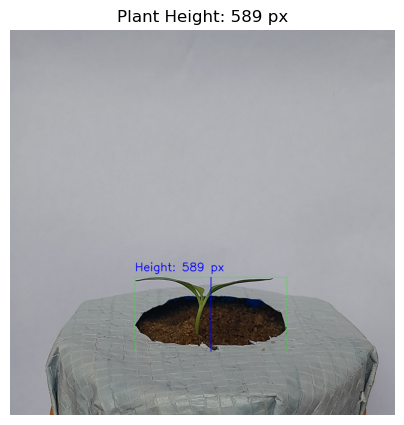

Enter image path (or 'q' to quit):  side_view/h2.jpg


Plant height: 602 pixels


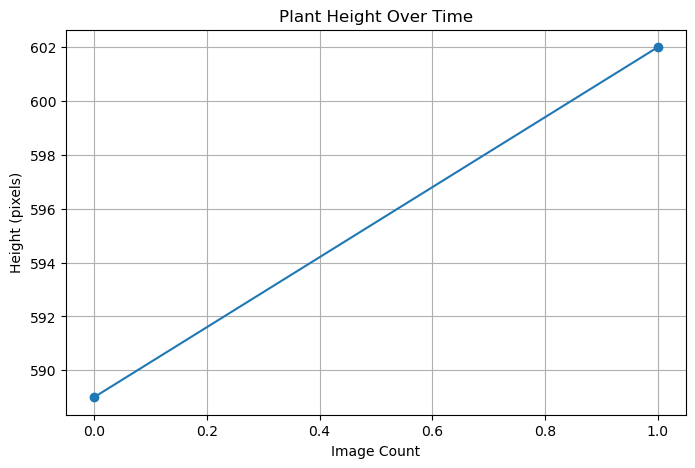

Enter image path (or 'q' to quit):  side_view/h3.jpg


Plant height: 653 pixels


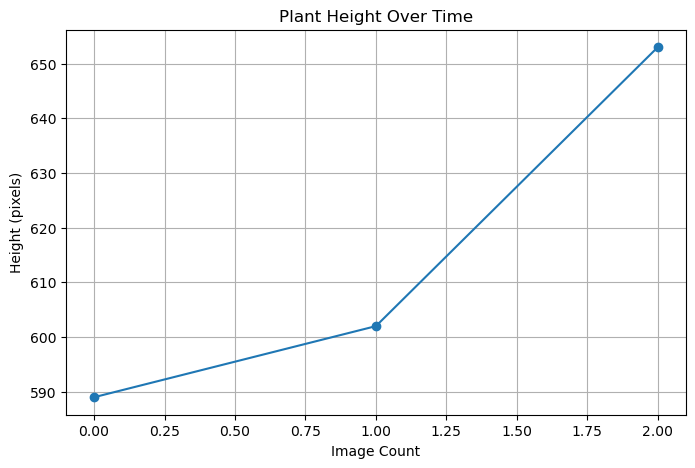

Enter image path (or 'q' to quit):  side_view/h4.jpg


Plant height: 713 pixels


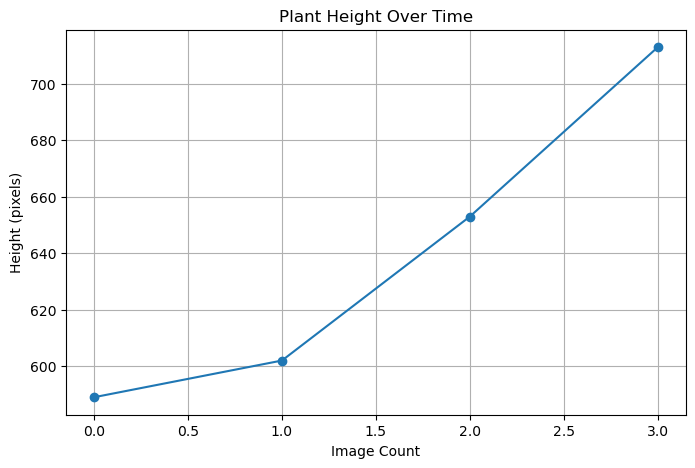

Enter image path (or 'q' to quit):  side_view/h5.jpg


Plant height: 756 pixels


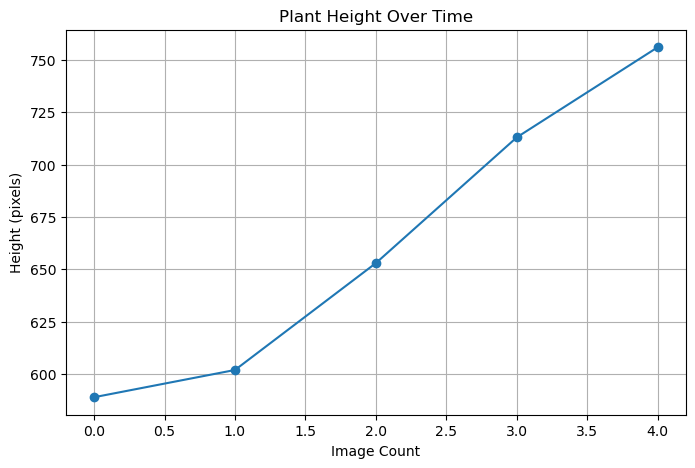

Enter image path (or 'q' to quit):  side_view/h5.jpg


Plant height: 756 pixels


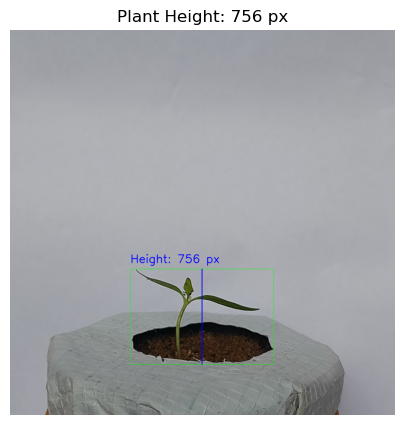

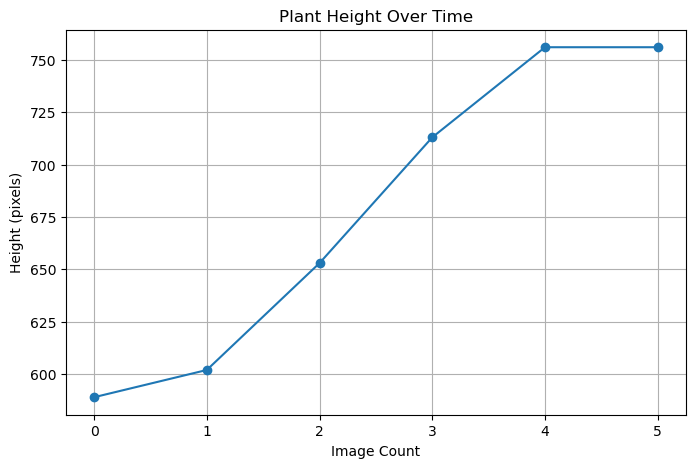

Enter image path (or 'q' to quit):  side_view/h6.jpg


Plant height: 773 pixels


Enter image path (or 'q' to quit):  side_view/h6.jpg


Plant height: 773 pixels


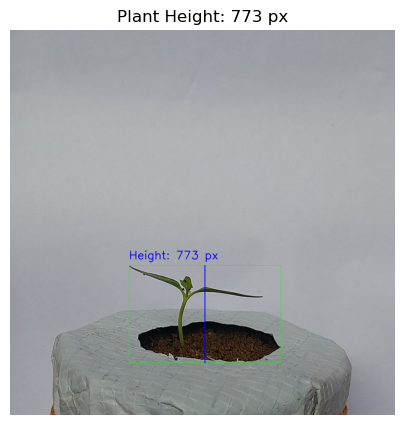

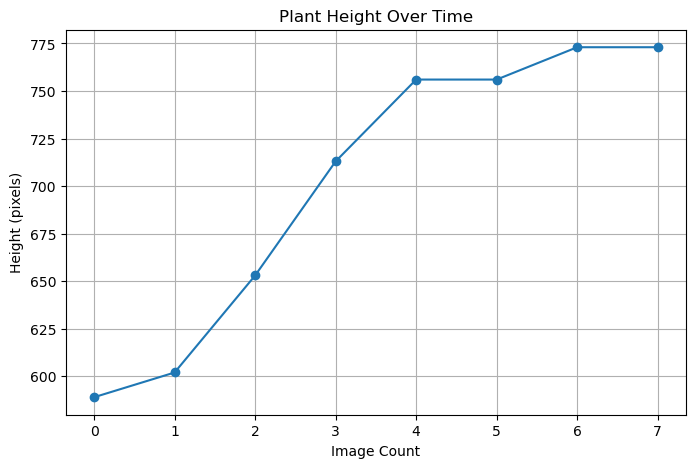

Enter image path (or 'q' to quit):  side_view/h8.jpg


Plant height: 755 pixels


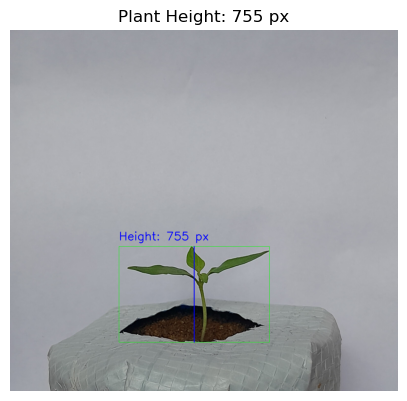

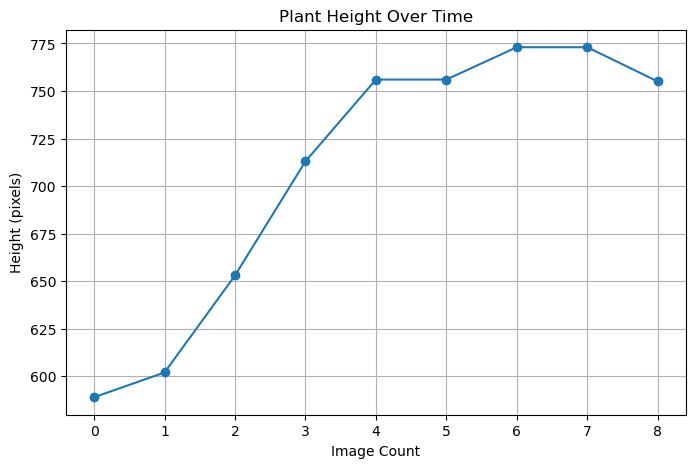

Enter image path (or 'q' to quit):  side_view/h9.jpg


Plant height: 973 pixels


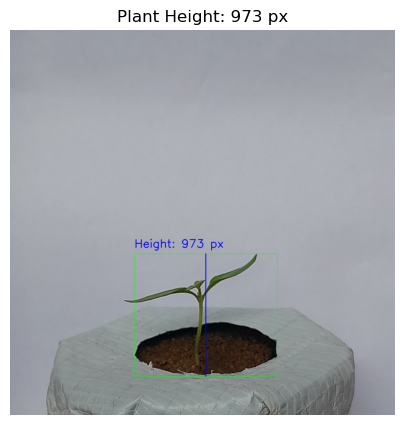

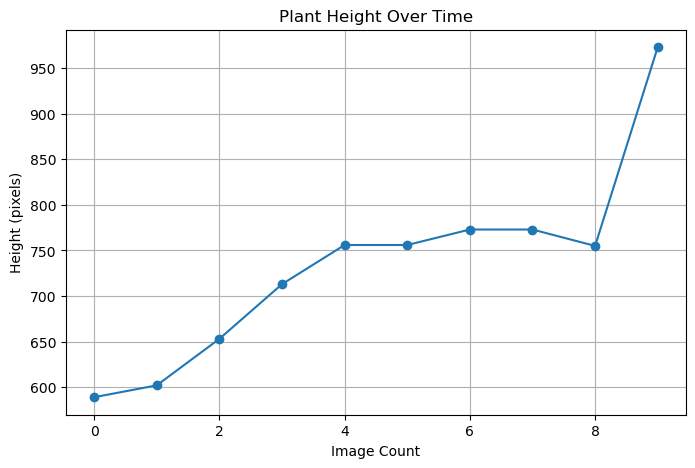

Enter image path (or 'q' to quit):  side_view/h10.jpg


Plant height: 965 pixels


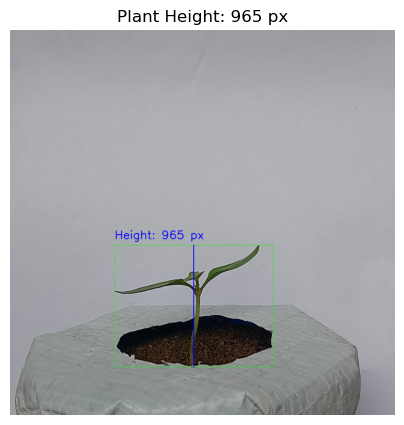

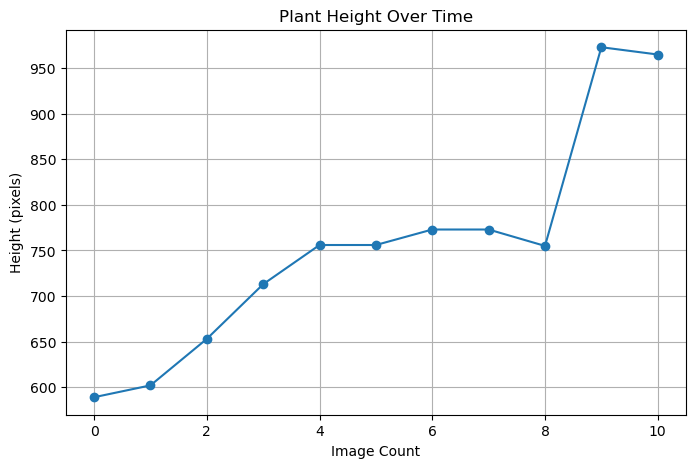

Enter image path (or 'q' to quit):  side_view/h11.jpg


Plant height: 952 pixels


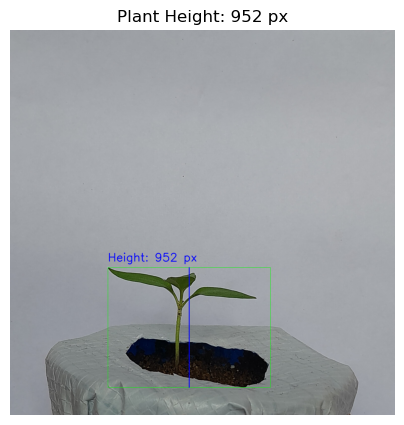

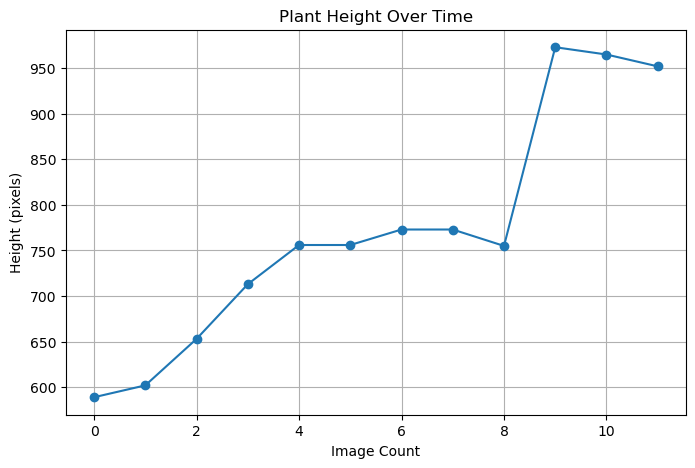

Enter image path (or 'q' to quit):  side_view/h12.jpg


Plant height: 980 pixels


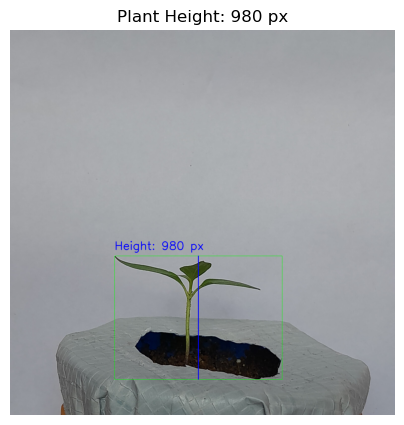

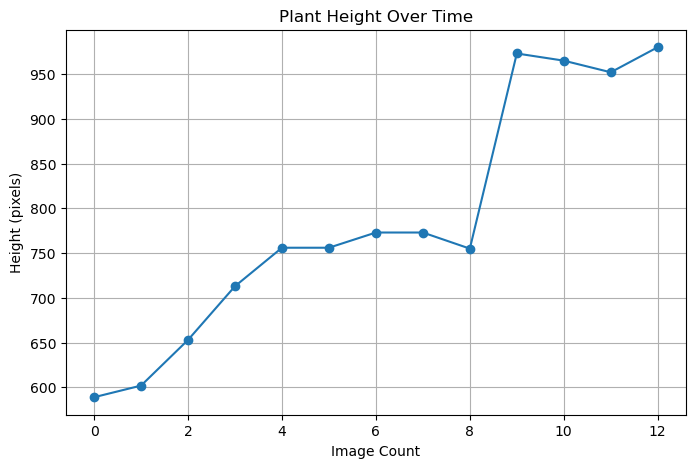

Enter image path (or 'q' to quit):  side_view/h13.jpg


Plant height: 986 pixels


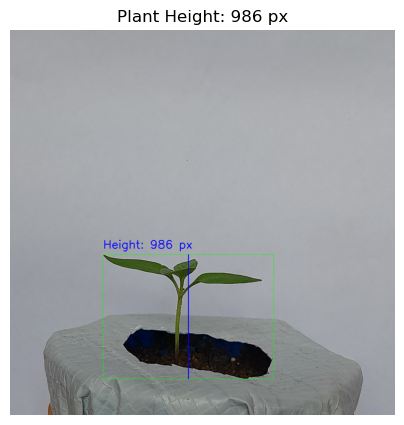

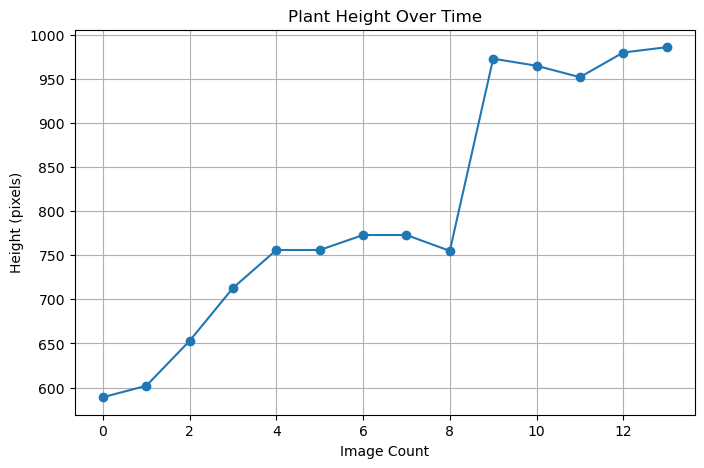

Enter image path (or 'q' to quit):  side_view/h14.jpg


Plant height: 1000 pixels


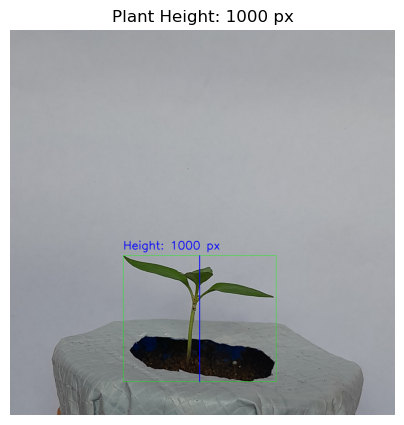

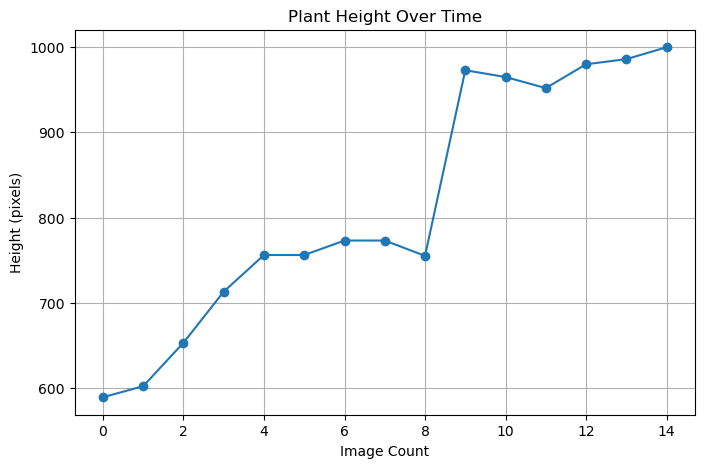

Enter image path (or 'q' to quit):  side_view/h15.jpg


Plant height: 1005 pixels


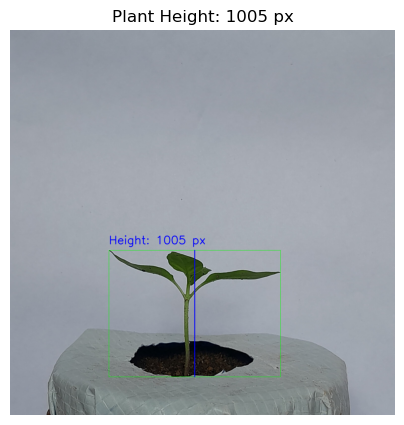

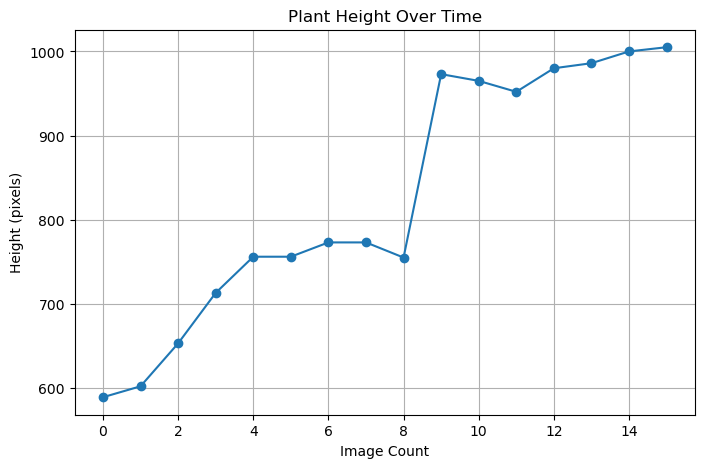

Enter image path (or 'q' to quit):  side_view/h15.jpg


Plant height: 1005 pixels


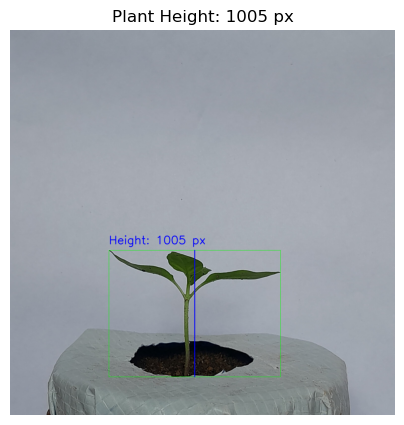

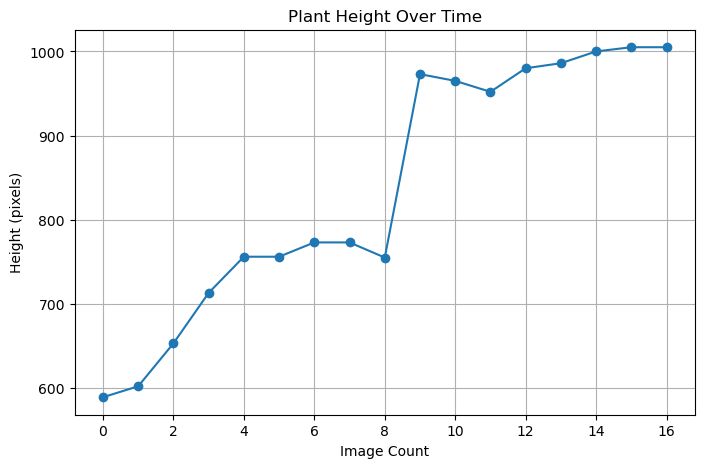

Enter image path (or 'q' to quit):  side_view/h16.jpg


Plant height: 1092 pixels


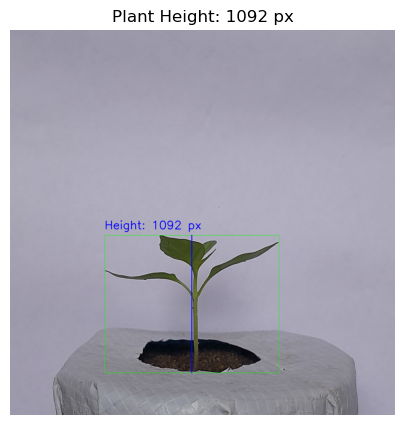

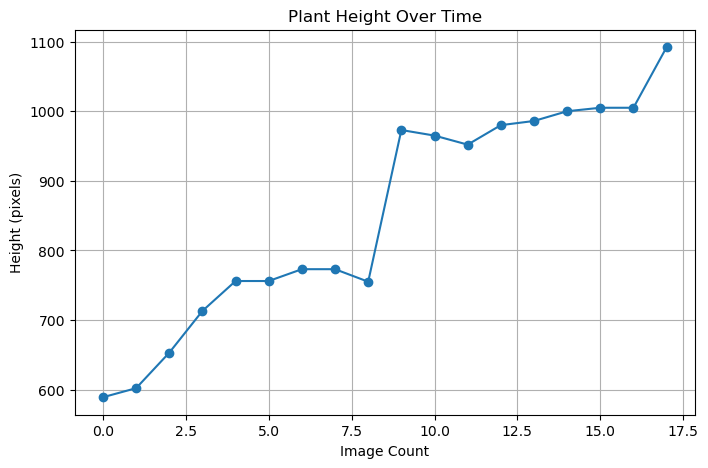

Enter image path (or 'q' to quit):  side_view/h16.jpg


Plant height: 1092 pixels


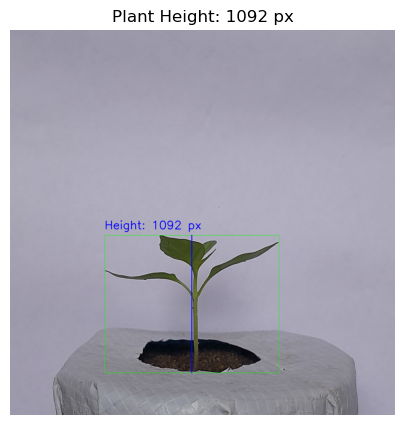

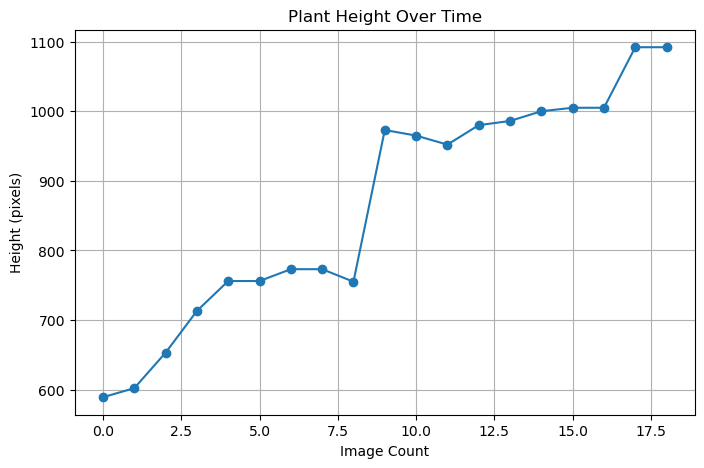

Enter image path (or 'q' to quit):  side_view/h18.jpg


Plant height: 1133 pixels


Enter image path (or 'q' to quit):  side_view/h19.jpg


Plant height: 1137 pixels


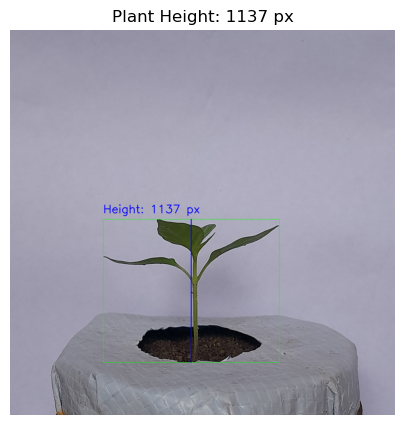

Enter image path (or 'q' to quit):  side_view/h20.jpg


Plant height: 1162 pixels


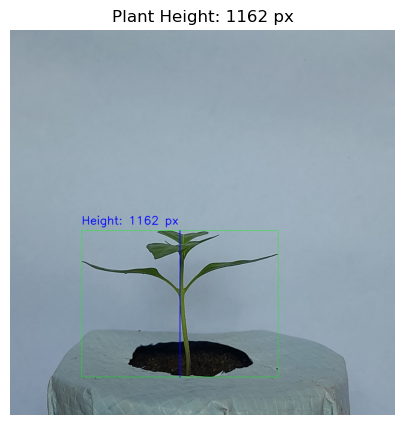

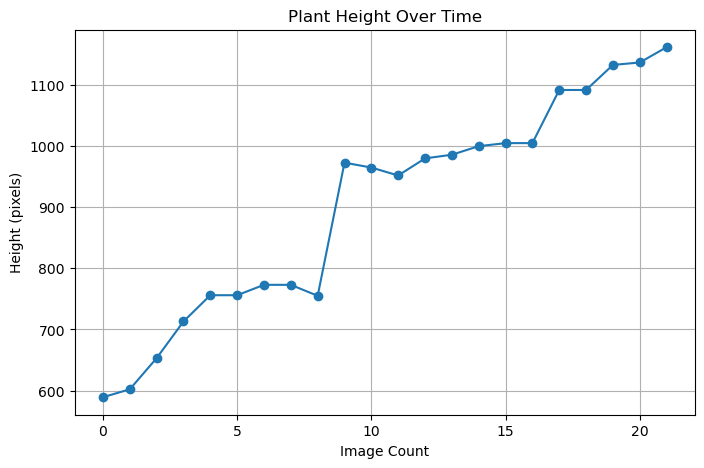

Enter image path (or 'q' to quit):  q


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# List to store plant heights
plant_heights = []

while True:
    # Load the image
    image_path = input("Enter image path (or 'q' to quit): ")
    if image_path.lower() == 'q':
        break
    
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Could not load image.")
        continue
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny edge detection to identify plant edges
    edges = cv2.Canny(blurred, 50, 150)

    # Morphological operations to close gaps in edges
    kernel = np.ones((5, 5), np.uint8)
    edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Find contours from the edge map
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Identify the largest contour (assumed to be the plant)
    if contours:
        plant_contour = max(contours, key=cv2.contourArea)

        # Get bounding box around the plant
        x, y, w, h = cv2.boundingRect(plant_contour)

        # Draw the bounding box and height line
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.line(image, (x + w // 2, y), (x + w // 2, y + h), (255, 0, 0), 6)

        # Record the height
        height = h
        plant_heights.append(height)

        # Display height in pixels
        cv2.putText(image, f'Height: {height} px', (x, y - 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0), 6)
        print(f'Plant height: {height} pixels')

    # Convert BGR image to RGB for displaying in Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the result using Matplotlib
    plt.figure(figsize=(5, 5))
    plt.imshow(image_rgb)
    plt.title(f'Plant Height: {height} px')
    plt.axis('off')
    plt.show()

    # Plot the height progression
    plt.figure(figsize=(8, 5))
    plt.plot(plant_heights, marker='o', linestyle='-')
    plt.title('Plant Height Over Time')
    plt.xlabel('Image Count')
    plt.ylabel('Height (pixels)')
    plt.grid(True)
    plt.show()


Enter image path (or 'q' to quit):  side_view/h1.jpg


Plant height: 589 pixels


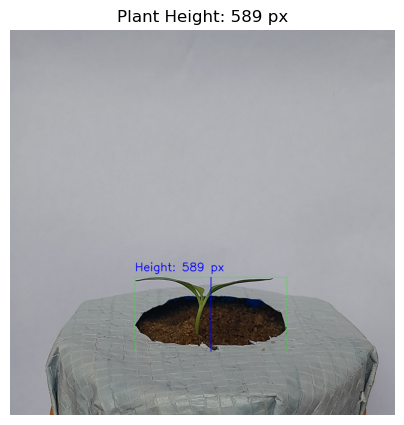

Enter image path (or 'q' to quit):  side_view/h2.jpg


Plant height: 602 pixels


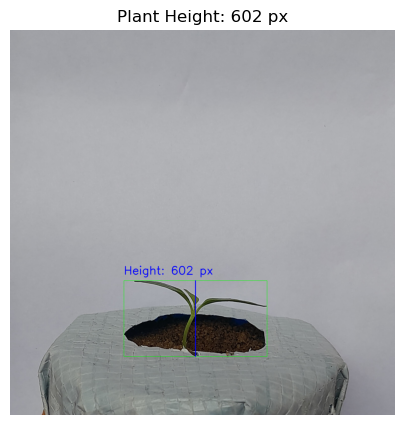

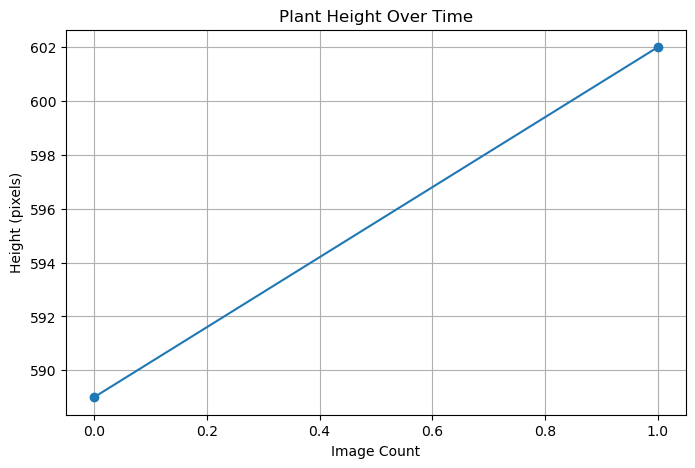

Enter image path (or 'q' to quit):  side_view/h3.jpg


Plant height: 653 pixels


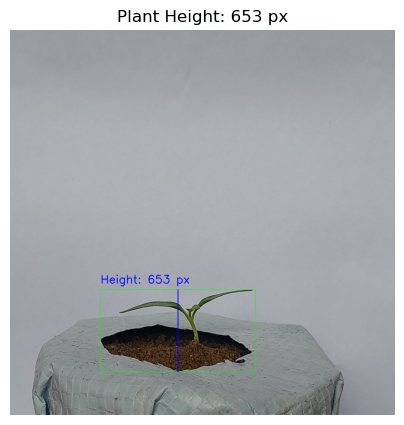

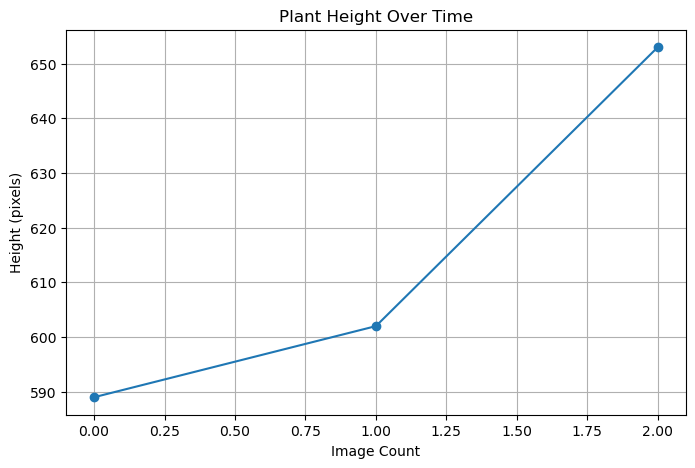

Enter image path (or 'q' to quit):  side_view/h4.jpg


Plant height: 713 pixels


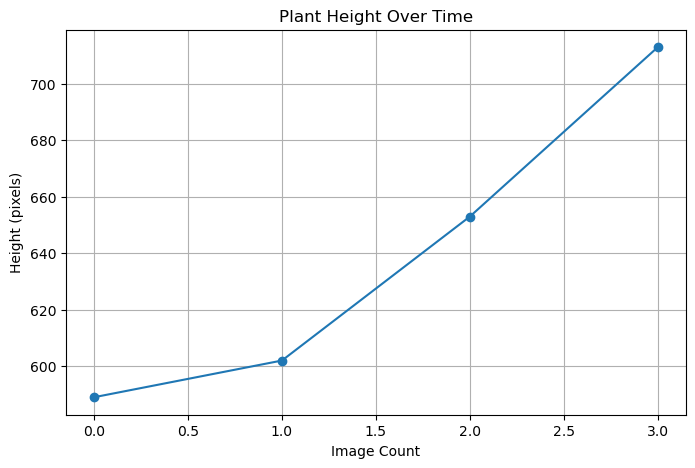

Enter image path (or 'q' to quit):  side_view/h5.jpg


Plant height: 756 pixels


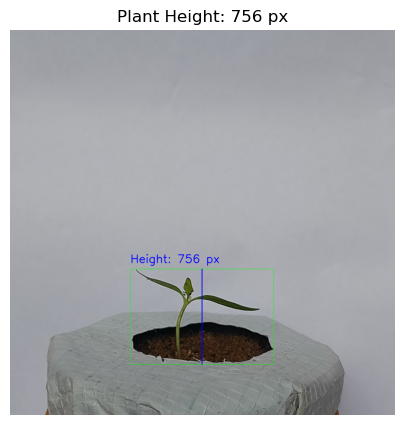

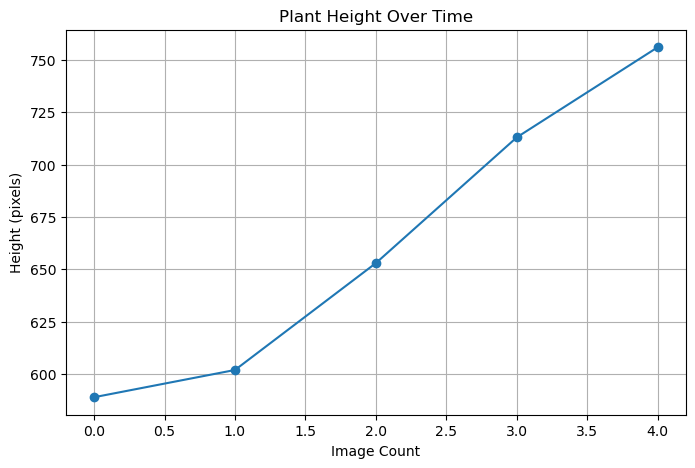

Enter image path (or 'q' to quit):  side_view/h5.jpg


Plant height: 756 pixels


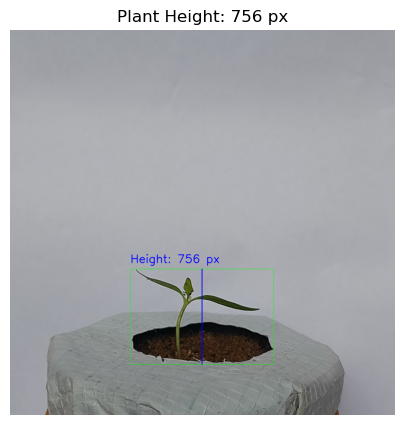

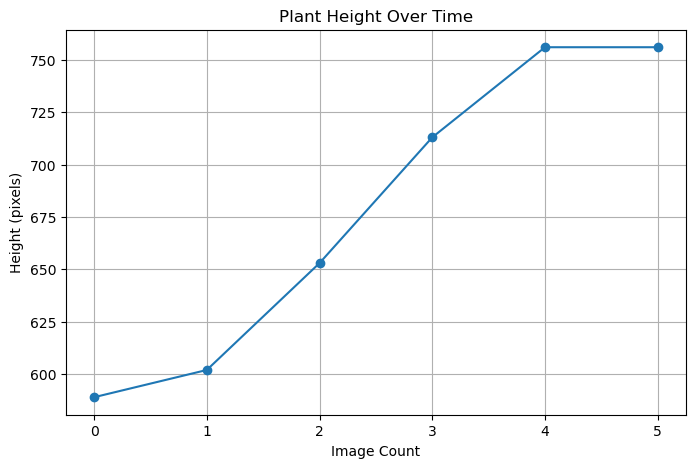

Enter image path (or 'q' to quit):  side_view/h6.jpg


Plant height: 773 pixels


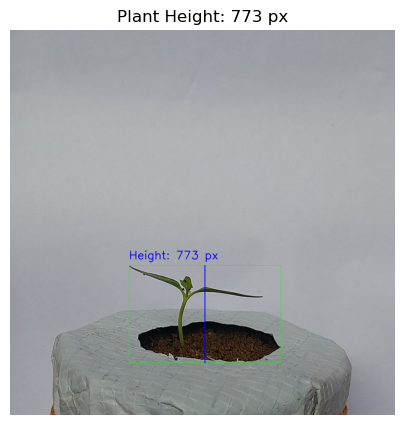

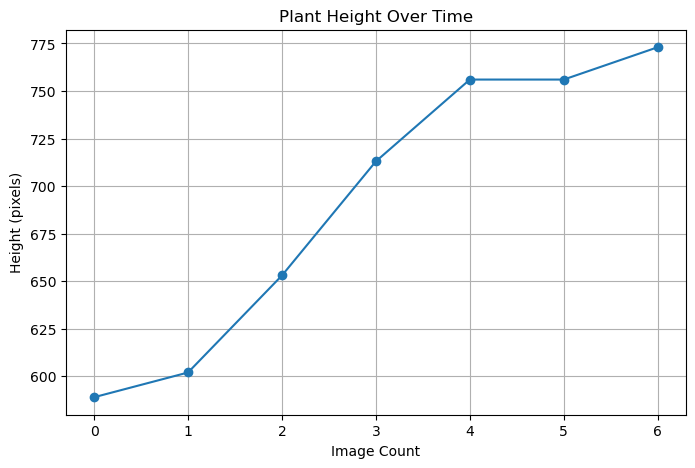

Enter image path (or 'q' to quit):  side_view/h6.jpg


Plant height: 773 pixels


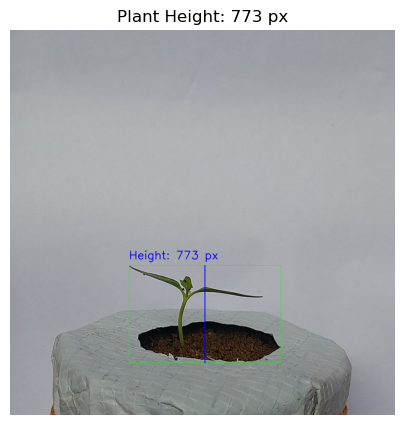

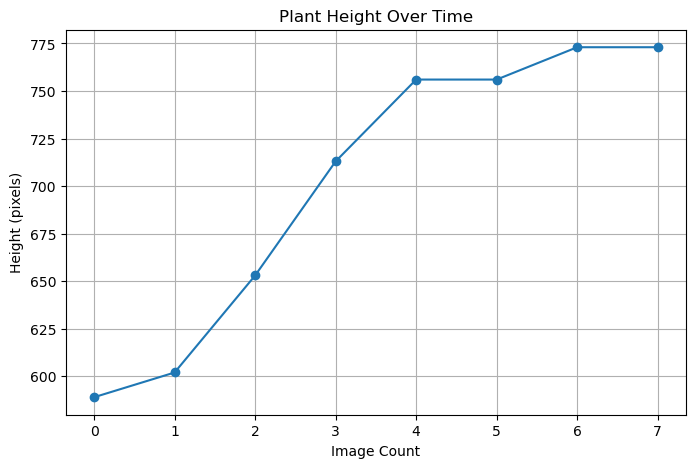

Enter image path (or 'q' to quit):  side_view/h8.jpg


Plant height: 755 pixels


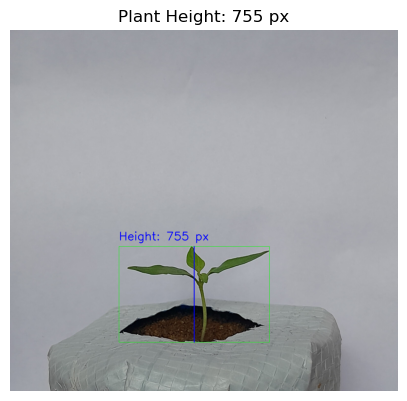

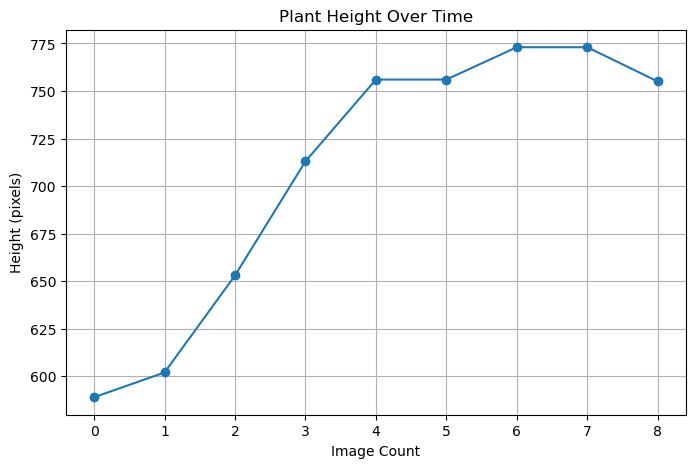

Enter image path (or 'q' to quit):  side_view/h9.jpg


Plant height: 973 pixels


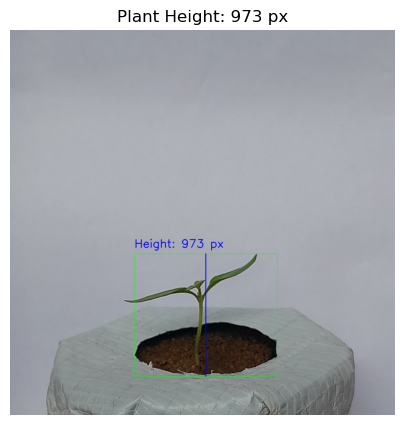

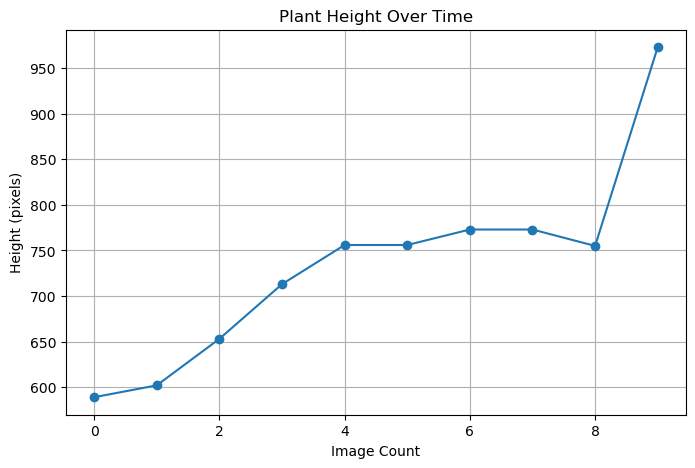

Enter image path (or 'q' to quit):  side_view/h10.jpg


Plant height: 965 pixels


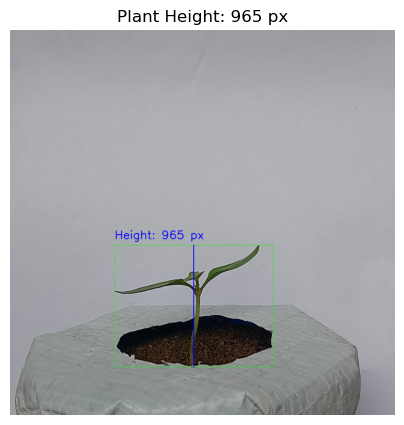

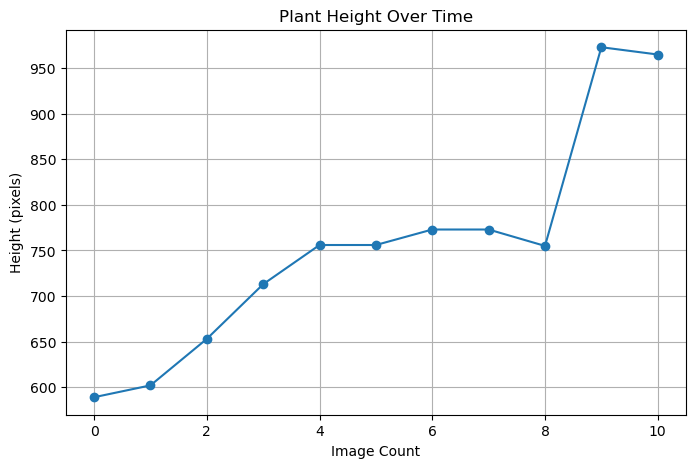

Enter image path (or 'q' to quit):  side_view/h11.jpg


Plant height: 952 pixels


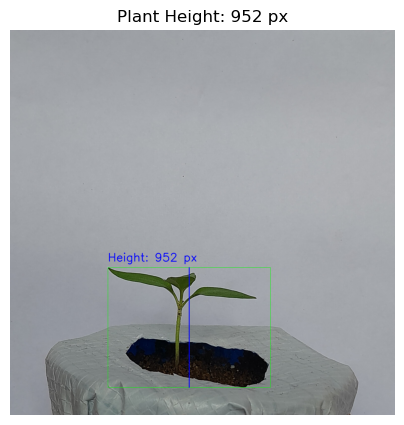

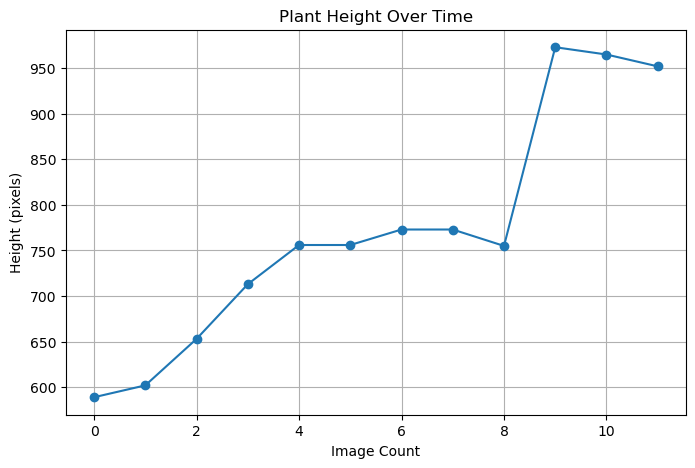

Enter image path (or 'q' to quit):  side_view/h12.jpg


Plant height: 980 pixels


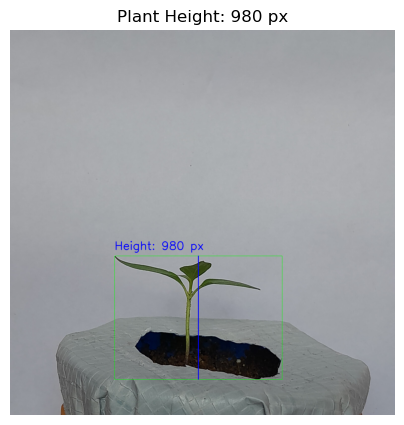

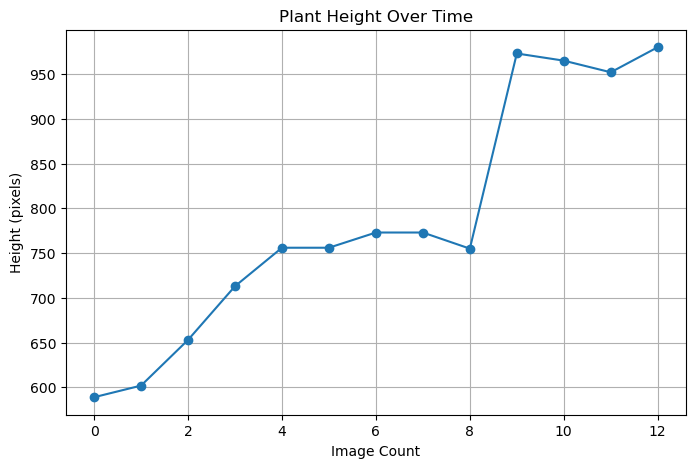

Enter image path (or 'q' to quit):  side_view/h13.jpg


Plant height: 986 pixels


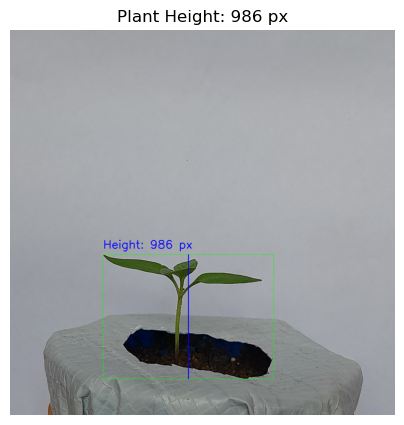

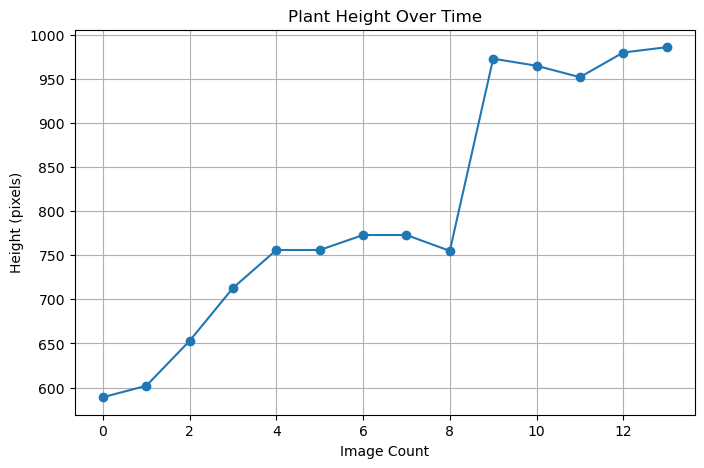

Enter image path (or 'q' to quit):  side_view/h14.jpg


Plant height: 1000 pixels


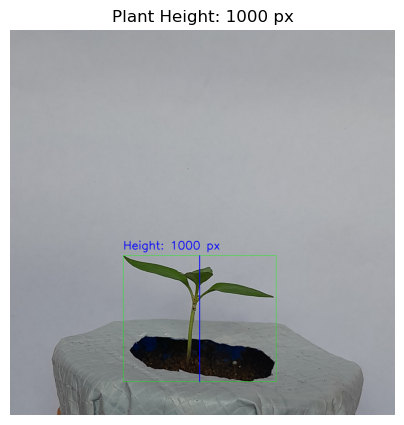

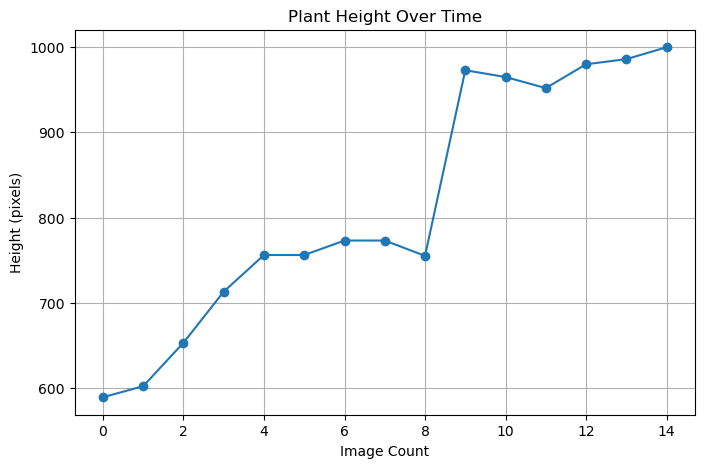

Enter image path (or 'q' to quit):  side_view/h15.jpg


Plant height: 1005 pixels


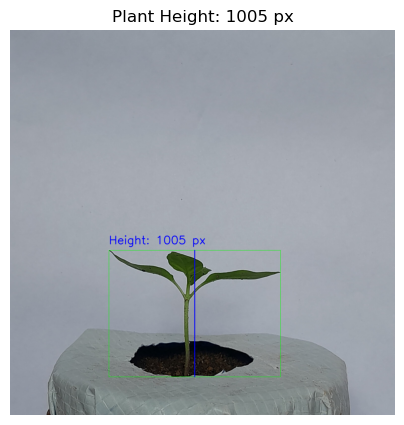

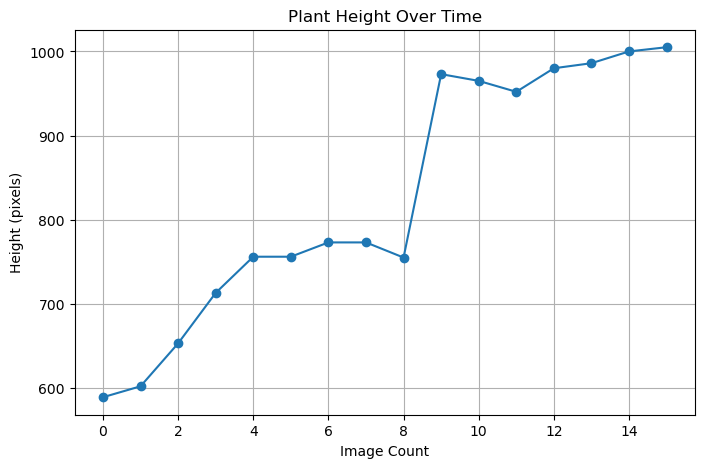

Enter image path (or 'q' to quit):  side_view/h15.jpg


Plant height: 1005 pixels


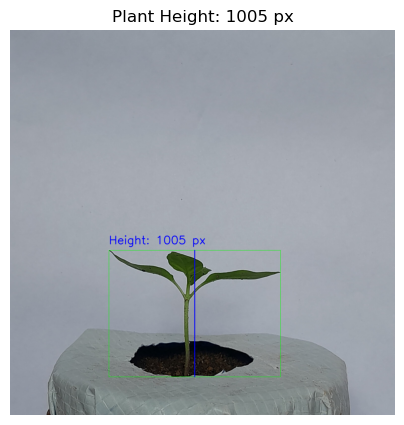

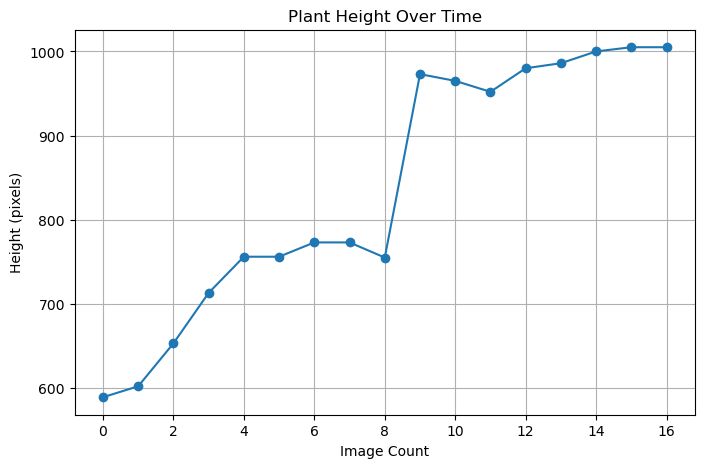

Enter image path (or 'q' to quit):  side_view/h16.jpg


Plant height: 1092 pixels


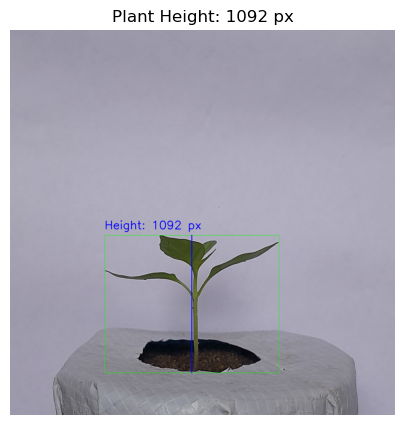

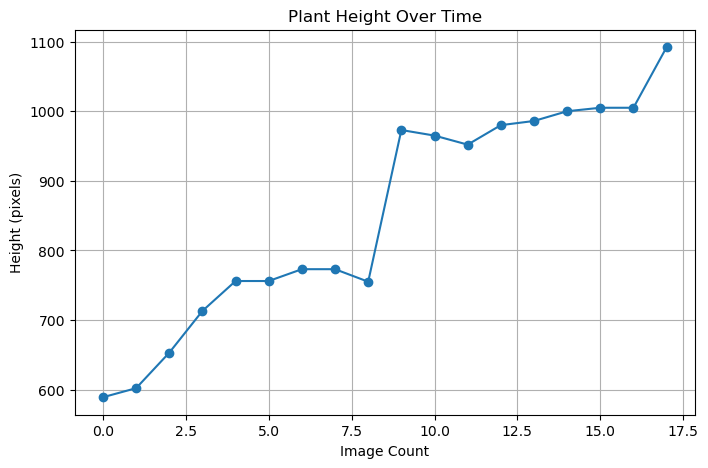

Enter image path (or 'q' to quit):  side_view/h16.jpg


Plant height: 1092 pixels


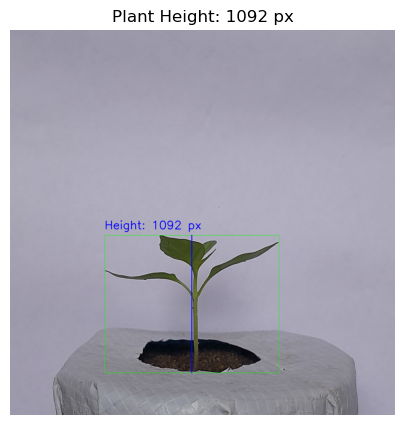

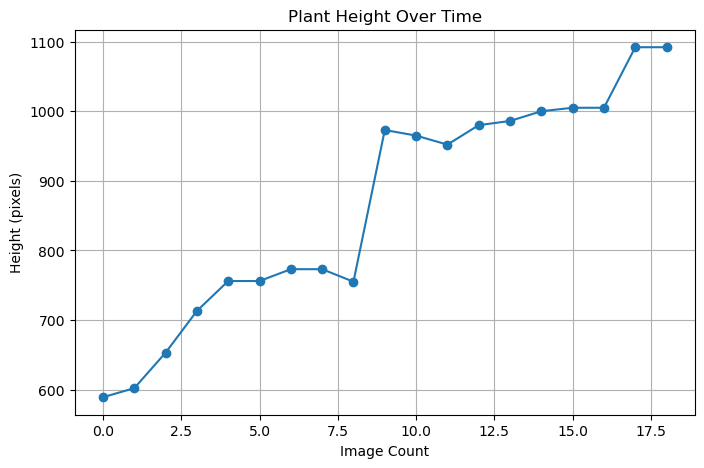

Enter image path (or 'q' to quit):  side_view/h18.jpg


Plant height: 1133 pixels


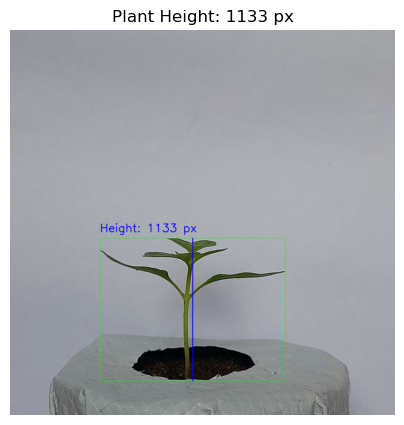

Enter image path (or 'q' to quit):  side_view/h19.jpg


Plant height: 1137 pixels


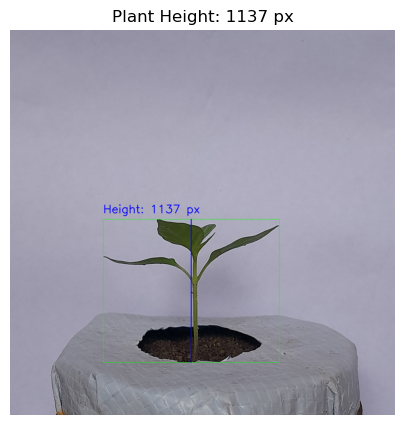

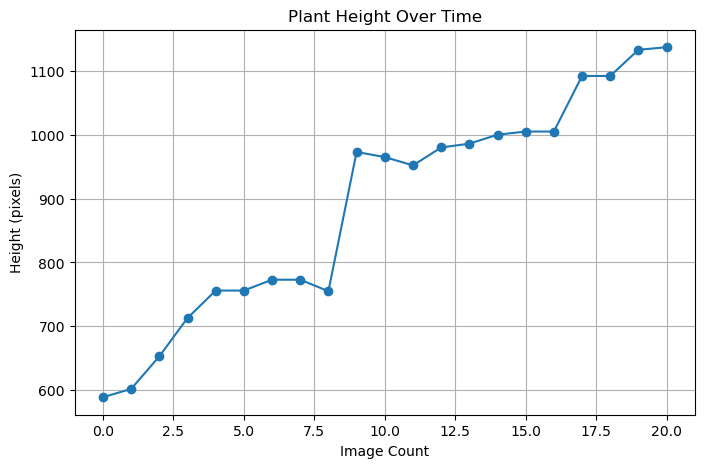

Enter image path (or 'q' to quit):  side_view/h20.jpg


Plant height: 1162 pixels


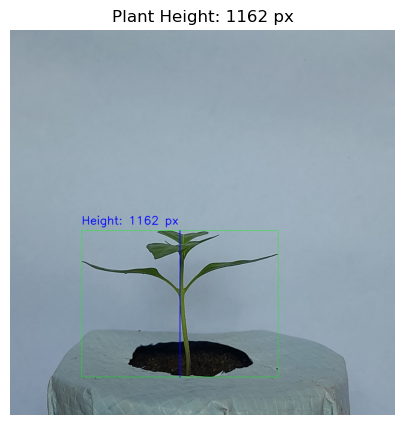

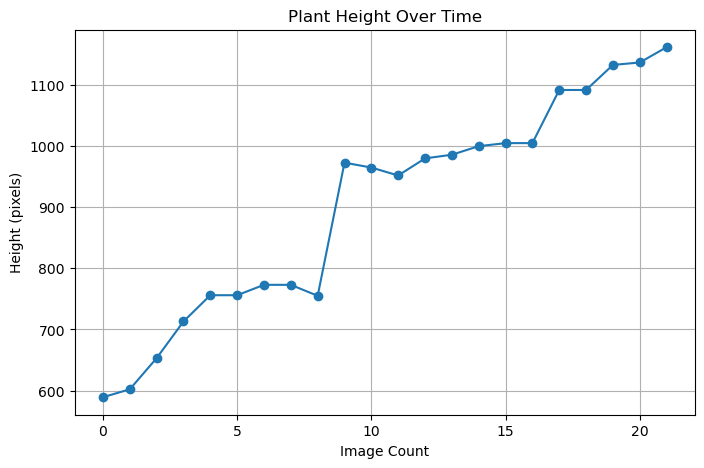

Enter image path (or 'q' to quit):  q


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# List to store plant heights
plant_heights = []

while True:
    # Load the image
    image_path = input("Enter image path (or 'q' to quit): ")
    if image_path.lower() == 'q':
        break
    
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Could not load image.")
        continue
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny edge detection to identify plant edges
    edges = cv2.Canny(blurred, 50, 150)

    # Morphological operations to close gaps in edges
    kernel = np.ones((5, 5), np.uint8)
    edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Find contours from the edge map
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Identify the largest contour (assumed to be the plant)
    if contours:
        plant_contour = max(contours, key=cv2.contourArea)

        # Get bounding box around the plant
        x, y, w, h = cv2.boundingRect(plant_contour)

        # Draw the bounding box and height line
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.line(image, (x + w // 2, y), (x + w // 2, y + h), (255, 0, 0), 6)

        # Record the height
        height = h
        plant_heights.append(height)

        # Display height in pixels
        cv2.putText(image, f'Height: {height} px', (x, y - 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0), 6)
        print(f'Plant height: {height} pixels')

    # Convert BGR image to RGB for displaying in Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the result using Matplotlib
    plt.figure(figsize=(5, 5))
    plt.imshow(image_rgb)
    plt.title(f'Plant Height: {height} px')
    plt.axis('off')
    plt.show()

    # Plot the height progression
    plt.figure(figsize=(8, 5))
    plt.plot(plant_heights, marker='o', linestyle='-')
    plt.title('Plant Height Over Time')
    plt.xlabel('Image Count')
    plt.ylabel('Height (pixels)')
    plt.grid(True)
    plt.show()
